# DATA PREPROCESSSING

In [86]:
import numpy as np
import pandas as pd

DATA=pd.read_csv("dataset/train_data.csv",delimiter=":::")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19916\3640598637.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  DATA=pd.read_csv("dataset/train_data.csv",delimiter=":::")


In [87]:
DATA.head()

,ID,NOM,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [88]:
DATA.isna().sum()

ID             0
NOM            0
GENRE          0
DESCRIPTION    0
dtype: int64

In [89]:
DATA.describe()

,ID,NOM,GENRE,DESCRIPTION
count,54214,54214,54214,54214
unique,54214,54214,27,54091
top,1,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,1,13613,12


In [90]:
DATA['GENRE'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

we need to affect eash genre with a number, called class

In [91]:
number_in_genre=DATA['GENRE'].value_counts()
print(number_in_genre)

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


Text(0, 0.5, 'genre')

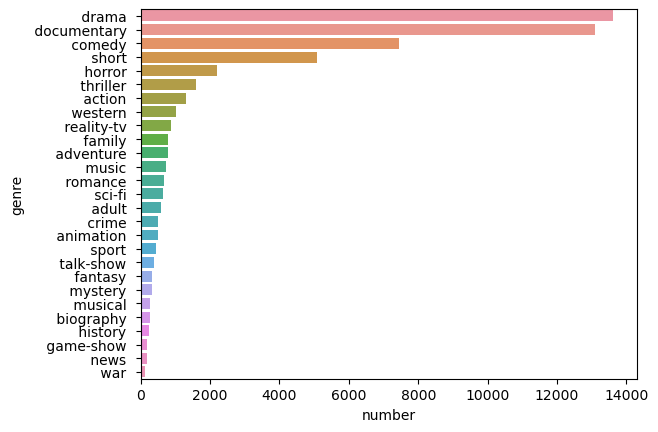

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=DATA,y="GENRE",order=DATA['GENRE'].value_counts().index)
plt.xlabel("number")
plt.ylabel("genre")

In [93]:
DATA=pd.read_csv("dataset/train_data.csv",delimiter=":::")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19916\1156193875.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  DATA=pd.read_csv("dataset/train_data.csv",delimiter=":::")


In [94]:
Classes = {
    'drama': 0,
    'thriller': 1,
    'adult': 3,
    'documentary': 4,
    'comedy': 5,
    'crime': 6,
    'reality-tv': 7,
    'horror': 8,
    'sport': 9,
    'animation': 10,
    'action': 11,
    'fantasy': 12,
    'short': 13,
    'sci-fi': 14,
    'music': 15,
    'adventure': 16,
    'talk-show': 17,
    'western': 18,
    'family': 19,
    'mystery': 20,
    'history': 21,
    'news': 22,
    'biography': 23,
    'romance': 24,
    'game-show': 25,
    'musical': 26,
    'war': 27
}
DATA['GENRE'] = DATA['GENRE'].str.strip()
DATA['GENRE'] = DATA['GENRE'].replace(Classes)


In [95]:
DATA.head(5)

,ID,NOM,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),0,Listening in to a conversation between his do...
1,2,Cupid (1997),1,A brother and sister with a past incestuous r...
2,"""3","Young, Wild and Wonderful (1980)",3,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),0,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),0,The film's title refers not only to the un-re...


In [96]:

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
import string

DATA['DESCRIPTION'] = DATA['DESCRIPTION'].astype(str)

DATA['DESCRIPTION'] = DATA['DESCRIPTION'].str.lower().str.replace('[{}]'.format(string.punctuation), '').str.split()


In [98]:
DATA.head()

,ID,NOM,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),0,"[listening, in, to, a, conversation, between, ..."
1,2,Cupid (1997),1,"[a, brother, and, sister, with, a, past, inces..."
2,"""3","Young, Wild and Wonderful (1980)",3,"[as, the, bus, empties, the, students, for, th..."
3,4,The Secret Sin (1915),0,"[to, help, their, unemployed, father, make, en..."
4,5,The Unrecovered (2007),0,"[the, film's, title, refers, not, only, to, th..."


In [99]:
DATA['DESCRIPTION'][0]

['listening',
 'in',
 'to',
 'a',
 'conversation',
 'between',
 'his',
 'doctor',
 'and',
 'parents,',
 '10-year-old',
 'oscar',
 'learns',
 'what',
 'nobody',
 'has',
 'the',
 'courage',
 'to',
 'tell',
 'him.',
 'he',
 'only',
 'has',
 'a',
 'few',
 'weeks',
 'to',
 'live.',
 'furious,',
 'he',
 'refuses',
 'to',
 'speak',
 'to',
 'anyone',
 'except',
 'straight-talking',
 'rose,',
 'the',
 'lady',
 'in',
 'pink',
 'he',
 'meets',
 'on',
 'the',
 'hospital',
 'stairs.',
 'as',
 'christmas',
 'approaches,',
 'rose',
 'uses',
 'her',
 'fantastical',
 'experiences',
 'as',
 'a',
 'professional',
 'wrestler,',
 'her',
 'imagination,',
 'wit',
 'and',
 'charm',
 'to',
 'allow',
 'oscar',
 'to',
 'live',
 'life',
 'and',
 'love',
 'to',
 'the',
 'full,',
 'in',
 'the',
 'company',
 'of',
 'his',
 'friends',
 'pop',
 'corn,',
 'einstein,',
 'bacon',
 'and',
 'childhood',
 'sweetheart',
 'peggy',
 'blue.;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;']

as we see , this is a good why to delete the pounctuation , and slipt the data, now we must delete the words like 'to' 'in'..

In [100]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
DATA['DESCRIPTION'] =DATA['DESCRIPTION'].apply(lambda x: [word for word in x if word not in stop_words]) 

In [101]:
DATA.head()

,ID,NOM,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),0,"[listening, conversation, doctor, parents,, 10..."
1,2,Cupid (1997),1,"[brother, sister, past, incestuous, relationsh..."
2,"""3","Young, Wild and Wonderful (1980)",3,"[bus, empties, students, field, trip, museum, ..."
3,4,The Secret Sin (1915),0,"[help, unemployed, father, make, ends, meet,, ..."
4,5,The Unrecovered (2007),0,"[film's, title, refers, un-recovered, bodies, ..."


In [102]:
DATA['DESCRIPTION'][0]

['listening',
 'conversation',
 'doctor',
 'parents,',
 '10-year-old',
 'oscar',
 'learns',
 'nobody',
 'courage',
 'tell',
 'him.',
 'weeks',
 'live.',
 'furious,',
 'refuses',
 'speak',
 'anyone',
 'except',
 'straight-talking',
 'rose,',
 'lady',
 'pink',
 'meets',
 'hospital',
 'stairs.',
 'christmas',
 'approaches,',
 'rose',
 'uses',
 'fantastical',
 'experiences',
 'professional',
 'wrestler,',
 'imagination,',
 'wit',
 'charm',
 'allow',
 'oscar',
 'live',
 'life',
 'love',
 'full,',
 'company',
 'friends',
 'pop',
 'corn,',
 'einstein,',
 'bacon',
 'childhood',
 'sweetheart',
 'peggy',
 'blue.;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;']

AS WE SEE THE STOPWORDS IN ENGLISH ARE DELETED.e can calculate the number of words still in the description

In [103]:
DATA['NUMBER_OF_WORDS']=DATA['DESCRIPTION'].apply(len)
DATA.head()

,ID,NOM,GENRE,DESCRIPTION,NUMBER_OF_WORDS
0,1,Oscar et la dame rose (2009),0,"[listening, conversation, doctor, parents,, 10...",52
1,2,Cupid (1997),1,"[brother, sister, past, incestuous, relationsh...",16
2,"""3","Young, Wild and Wonderful (1980)",3,"[bus, empties, students, field, trip, museum, ...",58
3,4,The Secret Sin (1915),0,"[help, unemployed, father, make, ends, meet,, ...",111
4,5,The Unrecovered (2007),0,"[film's, title, refers, un-recovered, bodies, ...",57


WE CAN now think of lemmatization,that change the words on the source of the word

In [104]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [105]:
DATA['DESCRIPTION']=DATA['DESCRIPTION'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])
DATA['DESCRIPTION'].head()

0    [listening, conversation, doctor, parents,, 10...
1    [brother, sister, past, incestuous, relationsh...
2    [bus, empty, student, field, trip, museum, nat...
3    [help, unemployed, father, make, end, meet,, e...
4    [film's, title, refers, un-recovered, body, gr...
Name: DESCRIPTION, dtype: object

In [106]:
DATA['DESCRIPTION'].head()

0    [listening, conversation, doctor, parents,, 10...
1    [brother, sister, past, incestuous, relationsh...
2    [bus, empty, student, field, trip, museum, nat...
3    [help, unemployed, father, make, end, meet,, e...
4    [film's, title, refers, un-recovered, body, gr...
Name: DESCRIPTION, dtype: object

NOT ALL THE WORDS ARE TRANSFORMED BUT ITS GOOD ACTUALLY

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(max_features=10000, ngram_range=(1, 2))


DATA['DESCRIPTION'] = DATA['DESCRIPTION'].apply(lambda x: ' '.join(x))
#i do this because fit-transform want a string in the argument 

X = count.fit_transform(DATA['DESCRIPTION'])

Y = DATA['GENRE'].values



In [108]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.1)
classifier.fit(X,Y)

MultinomialNB(alpha=0.1)

mnow we can read our test data , and predict and compare the result
without forgetting that i added a header to my data at the beggining

In [110]:
test_DATA=pd.read_csv("dataset/test_data.txt",delimiter=":::")
test_DATA.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19916\1791413481.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_DATA=pd.read_csv("dataset/test_data.txt",delimiter=":::")


,ID,NOM,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


we have to do the same thing with this new data


In [111]:
test_DATA['DESCRIPTION'] =test_DATA['DESCRIPTION'].astype(str)

test_DATA['DESCRIPTION'] = test_DATA['DESCRIPTION'].str.lower().str.replace('[{}]'.format(string.punctuation), '').str.split()
test_DATA['DESCRIPTION'] =test_DATA['DESCRIPTION'].apply(lambda x: [word for word in x if word not in stop_words]) 
test_DATA['DESCRIPTION']=test_DATA['DESCRIPTION'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])
test_DATA['DESCRIPTION'].head(5)

0    [l.r., brane, love, life, -, car,, apartment,,...
1    [spain,, march, 1964:, quico, naughty, child, ...
2    [one, year, life, albin, family, shepherd, nor...
3    [father, died,, spoken, brother, 10, year, ser...
4    [known, internationally, martial, art, superst...
Name: DESCRIPTION, dtype: object

In [112]:

test_DATA['DESCRIPTION'] = test_DATA['DESCRIPTION'].apply(lambda x: ' '.join(x))
X_test = count.transform(test_DATA['DESCRIPTION'])


now we try to predict after the model is trained

In [113]:
predictions = classifier.predict(X_test)
print(predictions)


[ 0  0  4 ...  5  8 13]


now we have the predictions and we have the correct result in other file , wwe read rhis file and we must compare

In [114]:
true_DATA=pd.read_csv("dataset/test_data_solution.txt",delimiter=":::",header=None)
true_DATA.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19916\2384565449.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  true_DATA=pd.read_csv("dataset/test_data_solution.txt",delimiter=":::",header=None)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [115]:
HEADER=['id','title','GENRE','DESCRIPTION']
true_DATA.columns=HEADER
true_DATA.head()


,id,title,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [116]:
true_DATA['GENRE'] = true_DATA['GENRE'].str.strip()
true_DATA['GENRE'] = true_DATA['GENRE'].replace(Classes)
true_DATA.head()

,id,title,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),1,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),5,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),4,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),0,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),0,Before he was known internationally as a mart...


In [117]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(predictions,true_DATA['GENRE'])
matrix

array([[8179,  353,   44,  786, 1384,  101,   37,  181,    5,   38,  132,
          48,  883,   39,    9,   82,    3,   52,  160,   67,   28,    4,
          30,  260,    1,   46,   16],
       [ 440,  517,   11,   30,  115,   93,    4,  198,    0,    4,   84,
           7,  128,   31,    0,   18,    0,    7,    8,   61,    1,    1,
           1,    5,    0,    2,    1],
       [  64,    9,  299,   11,   46,    2,    4,    7,    1,    1,    4,
           2,   25,    2,    2,  113,    0,    0,    1,    0,    0,    0,
           1,   11,    0,    0,    0],
       [1140,   41,   13, 9614,  318,   31,  119,   56,   66,   47,   62,
          18, 1175,   41,   75,   64,   67,   10,   63,   18,  142,   61,
         145,   14,    5,   27,   19],
       [1295,  106,  115,  243, 4010,   48,  112,   81,    6,   59,   64,
          11,  459,   21,   23,   51,   32,   15,  111,   26,    4,    7,
          10,  115,   10,   67,    2],
       [ 150,   68,    4,   45,   55,  105,    3,   13,    0,    

In [121]:
 from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(predictions,true_DATA['GENRE'])
print(accuracy1)

0.5537453874538746


In [122]:
dernieres_lignes = true_DATA.tail(3)
dernieres_lignes

,id,title,GENRE,DESCRIPTION
54197,54198,Oliver Twink (2007),3,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),0,"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),0,"Curitiba is a city in movement, with rhythms ..."


NOW AFTER seeing the score is 55% , we can try another algorithme 
RANDOME FOREST CLASSIFIER

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 2))
X = vectorizer.fit_transform(DATA['DESCRIPTION'])
X_test = vectorizer.transform(test_DATA['DESCRIPTION'])
print("ok")


ok


In [132]:
Y = DATA['GENRE'].values
classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
classifier2.fit(X, Y)
print("ok")

ok


In [134]:
predictions2=classifier2.predict(X_test)
print(predictions2)

[0 0 4 ... 0 0 4]


In [135]:
accuracy2=accuracy_score(predictions2,true_DATA['GENRE'])
accuracy2

0.49719557195571956

NOW LOGISTIC REGRESSION

In [136]:
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(max_iter=1000, random_state=42)
classifier3.fit(X, Y)


LogisticRegression(max_iter=1000, random_state=42)

In [137]:
predicitions3=classifier3.predict(X_test)
predicitions3

array([ 5,  0,  4, ...,  5,  8, 13], dtype=int64)

In [138]:
accuracy3 = accuracy_score(predicitions3,true_DATA['GENRE'])
accuracy3

0.5430627306273063

In [139]:
report = classification_report(true_DATA['GENRE'],predicitions3)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.64      0.60     13612
           1       0.25      0.21      0.23      1590
           3       0.57      0.39      0.46       590
           4       0.69      0.75      0.72     13096
           5       0.50      0.55      0.52      7446
           6       0.17      0.09      0.12       505
           7       0.41      0.32      0.36       883
           8       0.61      0.56      0.58      2204
           9       0.54      0.37      0.44       431
          10       0.27      0.14      0.19       498
          11       0.37      0.32      0.35      1314
          12       0.27      0.11      0.16       322
          13       0.35      0.38      0.36      5072
          14       0.44      0.30      0.36       646
          15       0.57      0.46      0.51       731
          16       0.38      0.25      0.31       775
          17       0.48      0.32      0.39       391
          18       0.88    

In [ ]:
resume = {
    "Méthode": [ "MultinomialNB", "RandomForest","LogisticRegression"],
    "ACCRURACY": [accuracy, accuracy2, accuracy3],
    "Precision": [A, B, C,D]
}

data = pd.DataFrame(resume)